<a href="https://colab.research.google.com/gist/fernandoferreira-me/61e9e4a25060f95abbfdb8cb90aaaed9/question-rio-projeto-de-disciplina-de-text-mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Disciplina de Processamento de Linguagem Natural com Python

Bem-vindo ao projeto de disciplina de **Processamento de Linguagem Natural com Python**. Ao longo das últimas aulas vimos uma série de aplicações que nos deram a amplitude de possibilidades em trabalhar com textos. Para tal, usamos diversas bibliotecas, onde as que mais se destacaram foram NLTK, SPACY e GENSIM.

Esse notebook servirá de guia para a execução de uma análise de tópicos completa, usando o algoritmo de LDA e recursos para interpretação dos resultados. Utilizaremos notícias da seção "Mercado" extraídas da Folha de S. Paulo no ano de 2016.  Complete a análise com os códigos que achar pertinente e responda as questões presentes no Moodle. Boa sorte!

## O Notebook

Nesse notebook, você será guiado pela análise de **Extração de Tópicos**. As seguintes tarefas serão realizadas


1.   Download dos dados provenientes do kaggle 
2.   Seleção dos dados relevantes para a nossa análise
3.   Instalação das principais ferramentas e importação de módulos
4.   Pré-processamento usando NLTK
5.   Pré-processamento usando Spacy
6.   Análise de tópicos usando LDA
7.   Análise de NER usando Spacy
8.   Visualização dos tópicos usando tokens e entidades.



## Instruções para baixar os dados

Para baixar os dados será necessário o uso do gerenciador de downloads da Kaggle. A Kaggle, uma subsidiária do grupo Alphabet (Google), é uma comunidade on-line de cientistas de dados e profissionais de aprendizado de máquina.

Para utilizar o gerenciador, será necessário criar uma conta no site Kaggle.com.
Com a conta criada, obtenha um token de acesso, no formato kaggle.json

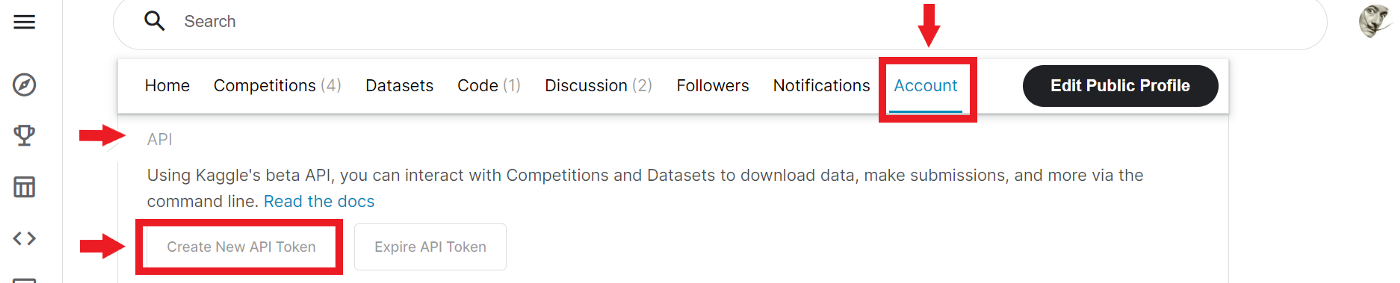

Em posse do token (baixe para seu computador), execute a células da próxima seção para acessar os dados de interesse e baixá-los.

# Baixe os dados

Instale o gerenciador kaggle no ambiente do Colab e faça o upload do arquivo kaggle.json

### 1 - Qual o endereço do seu notebook (colab) executado? Use o botão de compartilhamento do colab para obter uma url.

https://github.com/lucasmaiamoreira/NLP-Text-Analysis.git

### Todas as bibliotecas usadas estão dentro do arquivo requirements.txt

#### Será necessário realizar a instalação usando o comando abaixo:

pip install -r requirements.txt

In [1]:
# !pip install -q kaggle
# !rm -rf kaggle.json
# # from google.colab import files

# # files.upload()

Crie a pasta .kaggle

In [2]:
# !rm -rf .kaggle
# !mkdir .kaggle
# !cp kaggle.json .kaggle/
# !chmod 600 .kaggle/kaggle.json

Baixe o dataset

In [25]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer

from typing import List, Set, Any

import pandas as pd
from tqdm import tqdm

import spacy
from spacy.lang.pt.stop_words import STOP_WORDS
from scipy.sparse import csr_matrix
from spacy.lang.pt import Portuguese


from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np

import pyLDAvis
import pyLDAvis.lda_model

from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

from sklearn.decomposition import LatentDirichletAllocation

import warnings

warnings.filterwarnings('ignore')

SEED = 123

Dataset URL: https://www.kaggle.com/datasets/marlesson/news-of-the-site-folhauol
License(s): CC0-1.0
 99%|███████████████████████████████████████▋| 186M/187M [00:06<00:00, 27.4MB/s]
100%|████████████████████████████████████████| 187M/187M [00:07<00:00, 27.6MB/s]


# Atualizar o SPACY e  instalar os modelos pt_core_news_lg

### Célula que está o código que atualiza o spacy e instala o pacote pt_core_news_lg.

In [28]:
!python -m spacy download pt_core_news_lg
!pip install -U spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 5.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


### Download dos dados diretamente do kaggle:

In [29]:
!kaggle datasets download --force -d marlesson/news-of-the-site-folhauol

Dataset URL: https://www.kaggle.com/datasets/marlesson/news-of-the-site-folhauol
License(s): CC0-1.0
 99%|███████████████████████████████████████▌| 185M/187M [00:06<00:00, 34.1MB/s]
100%|████████████████████████████████████████| 187M/187M [00:07<00:00, 27.9MB/s]


### Criação do dataframe news_2016 (com examente 7943 notícias):

In [33]:
tqdm.pandas()
df = pd.read_csv("news-of-the-site-folhauol.zip")

### Modelo pt_core_news_lg sendo carregado, Todos os textos do dataframe precisam ser analisados usando os modelos carregados.

In [8]:
nlp = spacy.load("pt_core_news_lg")

print(list(STOP_WORDS)[:10])

['apoia', 'cento', 'toda', 'quê', 'saber', 'através', 'sim', 'ligado', 'nossas', 'neste']


## Instalar os datasets `stopwords`, `punkt` e `rslp` do nltk

### Download dos pacotes necessários para tokenização e stemming usando nltk:

In [32]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /home/lucas-
[nltk_data]     pessoal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/lucas-
[nltk_data]     pessoal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /home/lucas-
[nltk_data]     pessoal/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

## Carregar os módulos usados ao longo desse notebook

In [11]:
# !pip install pyldavis
# !pip install wordcloud
# !pip install seaborn

# Filtrando os dados para utilizar apenas as notícias do ano de 2016 e da categoria "Mercado"

Filtre os dados do DataFrame df e crie um DataFrame news_2016 que contenha apenas notícias de **2016** e da categoria **mercado**.

In [12]:
df['date'] = pd.to_datetime(df.date)

news_2016 = df[(df['date'].dt.year == 2016) & (df['category'] == 'mercado')].copy()

display(news_2016.head())

,title,text,date,category,subcategory,link
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...


## NLTK Tokenizer and Stemmer

Crie uma coluna no dataframe `news_2016` contendo os tokens para cada um dos textos. Os tokens devem estar representados pelo radical das palavras (stem). 
Para tal, complete o conteúdo da função `tokenize`.

### Função que tokeniza e realiza o stemming dos textos usando funções do nltk:

In [34]:
def tokenize(text: str) -> List[str]:
    """
    Função para tokenizar usando `nltk.tokenize.word_tokenize`
    
    Retorna:
        - Uma lista de tokens radicalizados (`nltk.stem.RSLPStemmer`)
        IMPORTANTE: Somente tokens com caracteres alfabéticos serão retornados.
    """
    stemmer = RSLPStemmer()

    tokens = word_tokenize(text, language='portuguese')
    
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token.isalpha()]
    return stemmed_tokens

news_2016.loc[:, 'nltk_tokens'] = news_2016.text.progress_map(tokenize)

display(news_2016.head())

  0%|          | 0/7943 [00:00<?, ?it/s]

100%|██████████| 7943/7943 [01:33<00:00, 85.10it/s] 


,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma,spacy_ner,tfidf,topic
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, Christine, Conder, modést...","[Ofcom, Cavamos, LEMA, Membro, Ordem do Impéri...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c...","(A, conta, do, celular, pós-pago, ou, controle...","[conta, celular, controle, ficar, cara, decisã...","[Oi, TIM, Claro, Vivo, GERCINA, FERNANDA BRIGA...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d...","[projeto, ajuste, conta, público, aprovar, mau...","[Executivo dos três Estados, Assembleias locai...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, se, diz, que,...","(Desde, as, primeiras, décadas, do, século, 19...","[década, século, nota, ópera, sinfonia, brotar...","[MIT, Instituto de Tecnologia de Massachusetts...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d...","(O, Cifras, &, Letras, seleciona, semanalmente...","[Cifras, Letras, selecionar, semanalmente, lan...","[NACIONAIS , Presidente da Singularity Univer...","[0.0, 0.04241729933086497, 0.0, 0.0, 0.0, 0.0,...",5


## Criar uma documento SPACY para cada texto do dataset

Crie uma coluna `spacy_doc` que contenha os objetos spacy para cada texto do dataset de interesse. Para tal, carregue os modelos `pt_core_news_lg` e aplique em todos os textos (pode demorar alguns minutos...)

In [14]:
def process_text(text: str) -> spacy.tokens.Doc:
    """
    Função para processar o texto usando o modelo do Spacy
    
    Retorna:
        - Objeto do documento Spacy
    """
    doc = nlp(text)
    return doc

news_2016['spacy_doc'] = news_2016['text'].progress_map(process_text)

display(news_2016.head())

100%|██████████| 7943/7943 [06:24<00:00, 20.68it/s]


,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro..."
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c...","(A, conta, do, celular, pós-pago, ou, controle..."
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d..."
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, se, diz, que,...","(Desde, as, primeiras, décadas, do, século, 19..."
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d...","(O, Cifras, &, Letras, seleciona, semanalmente..."


## Realize a Lematização usando SPACY

O modelo NLP do spacy oferece a possiblidade de lematizar textos em português (o que não acontece com a biblioteca NLTK). Iremos criar uma lista de tokens
lematizados para cada texto do nosso dataset. Para tal, iremos retirar as 
stopwords, usando uma função que junta stopwords provenientes do NLTK e do Spacy. Essa lista completa, é retornada pela função stopwords (e você não precisa mexer).

Já a função filter retorna True caso o token seja composto por caracters alfabéticos, não estiver dentro da lista de stopwords e o lemma resultante não estiver contido na lista `o", "em", "em o", "em a" e "ano"`.

Crie uma coluna chamada `spacy_lemma` para armazenar o resultado desse pré-processamento.

### Função que realiza a lematização usando o spacy:

In [15]:
def stopwords() -> Set[str]:
    """
    Retorna uma lista completa de stopwords
    """
    return set(list(nltk.corpus.stopwords.words("portuguese")) + list(STOP_WORDS))

complete_stopwords = stopwords()

def filter(w: spacy.tokens.Token) -> bool:
    """
    Filtrar stopwords e tokens indesejados
    """
    return not (w.is_stop or not w.is_alpha or w.lemma_ in complete_stopwords 
                or w.lemma_ in ["o", "em", "em o", "em a", "ano"])

def lemma(doc: spacy.tokens.Doc) -> List[str]:
    """
    Aplicar lematização do Spacy nos tokens de um texto
    
    Retorna:
        - uma lista representando o vocabulário padronizado (com lematização)
    """
    return [token.lemma_ for token in doc if filter(token)]

news_2016['spacy_lemma'] = news_2016['spacy_doc'].progress_map(lemma)

display(news_2016.head())

100%|██████████| 7943/7943 [00:02<00:00, 3945.08it/s]


,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, Christine, Conder, modést..."
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c...","(A, conta, do, celular, pós-pago, ou, controle...","[conta, celular, controle, ficar, cara, decisã..."
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d...","[projeto, ajuste, conta, público, aprovar, mau..."
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, se, diz, que,...","(Desde, as, primeiras, décadas, do, século, 19...","[década, século, nota, ópera, sinfonia, brotar..."
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d...","(O, Cifras, &, Letras, seleciona, semanalmente...","[Cifras, Letras, selecionar, semanalmente, lan..."


## Reconhecimento de entidades nomeadas

Crie uma coluna `spacy_ner` que armazene todas as organizações (APENAS organizações) que estão contidas no texto.

### Entidades dos textos foram extraídas. Estamos interessados apenas nas organizações.

In [16]:
def NER(doc: spacy.tokens.Doc):
    """
    Retorna a lista de organizações para um documento SPACY
    """
    organizations = [entity.text for entity in doc.ents if entity.label_ == 'ORG']
    return organizations

news_2016['spacy_ner'] = news_2016['spacy_doc'].progress_map(NER)

display(news_2016.head())


100%|██████████| 7943/7943 [00:00<00:00, 24505.43it/s]


,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma,spacy_ner
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, Christine, Conder, modést...","[Ofcom, Cavamos, LEMA, Membro, Ordem do Impéri..."
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c...","(A, conta, do, celular, pós-pago, ou, controle...","[conta, celular, controle, ficar, cara, decisã...","[Oi, TIM, Claro, Vivo, GERCINA, FERNANDA BRIGA..."
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d...","[projeto, ajuste, conta, público, aprovar, mau...","[Executivo dos três Estados, Assembleias locai..."
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, se, diz, que,...","(Desde, as, primeiras, décadas, do, século, 19...","[década, século, nota, ópera, sinfonia, brotar...","[MIT, Instituto de Tecnologia de Massachusetts..."
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d...","(O, Cifras, &, Letras, seleciona, semanalmente...","[Cifras, Letras, selecionar, semanalmente, lan...","[NACIONAIS , Presidente da Singularity Univer..."


## Bag-of-Words

Crie uma coluna `tfidf` no dataframe `news_2016`. Use a coluna `spacy_lemma` como base para cálculo do TFIDF. 
O número máximo de features que iremos considerar é 5000. E o token, tem que ter aparecido pelo menos 10 vezes (`min_df`) nos documentos. 

In [37]:
class Vectorizer:
    def __init__(self, doc_tokens: List[List[str]], max_features: int = 5000, min_df: int = 10):
        self.doc_tokens = doc_tokens
        self.max_features = max_features
        self.min_df = min_df
        self.tfidf_vectorizer = None

    def vectorizer(self):
        """
        Converte uma lista de tokens em um vetor TFIDF
        Retorna o vetor TFIDF e atribui-o a self.tfidf_vectorizer
        """
        
        self.tfidf_vectorizer = TfidfVectorizer(max_features=self.max_features, min_df=self.min_df)
        
        self.tfidf_vectorizer.fit([" ".join(tokens) for tokens in self.doc_tokens])
        
    def __call__(self):
        if self.tfidf_vectorizer is None:
            self.vectorizer()
        return self.tfidf_vectorizer

doc_tokens = news_2016['spacy_lemma'].tolist()

vectorizer = Vectorizer(doc_tokens)

### Função que cria o vetor de TF-IDF para cada texto:

In [38]:
def tokens2tfidf(tokens):
    vectorizer_instance = vectorizer()
    array = vectorizer_instance.transform([" ".join(tokens)]).toarray()[0]
    return array

news_2016['tfidf'] = news_2016['spacy_lemma'].progress_map(tokens2tfidf)

display(news_2016.head())

100%|██████████| 7943/7943 [00:06<00:00, 1263.84it/s]


,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma,spacy_ner,tfidf,topic
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, Christine, Conder, modést...","[Ofcom, Cavamos, LEMA, Membro, Ordem do Impéri...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c...","(A, conta, do, celular, pós-pago, ou, controle...","[conta, celular, controle, ficar, cara, decisã...","[Oi, TIM, Claro, Vivo, GERCINA, FERNANDA BRIGA...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d...","[projeto, ajuste, conta, público, aprovar, mau...","[Executivo dos três Estados, Assembleias locai...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, se, diz, que,...","(Desde, as, primeiras, décadas, do, século, 19...","[década, século, nota, ópera, sinfonia, brotar...","[MIT, Instituto de Tecnologia de Massachusetts...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d...","(O, Cifras, &, Letras, seleciona, semanalmente...","[Cifras, Letras, selecionar, semanalmente, lan...","[NACIONAIS , Presidente da Singularity Univer...","[0.0, 0.04241729933086497, 0.0, 0.0, 0.0, 0.0,...",5


## Extração de Tópicos

Realize a extração de 9 tópicos usando a implementação do sklearn do algoritmo Latent Dirichlet Allocation. Como parâmetros, você irá usar o número máximo de iterações igual à 100 (pode demorar) e o `random_seed` igual a `SEED` que foi setado no início do notebook

### Extraindo tópicos usando o algoritmo de LDA.

In [18]:
N_TOKENS = 9

corpus = np.array(news_2016['tfidf'].tolist())
lda = LatentDirichletAllocation(n_components=N_TOKENS, max_iter=100, random_state=SEED)
lda.fit(corpus)

LatentDirichletAllocation(max_iter=100, n_components=9, random_state=123)

### Visualize os tópicos usando a ferramenta pyLDAVis

### Visualização LDAVis criada:

In [39]:
corpus_sparse = csr_matrix(corpus)

pyLDAvis.enable_notebook()
vis_data = pyLDAvis.lda_model.prepare(lda, corpus_sparse, vectorizer())

pyLDAvis.display(vis_data)

### Atribua a cada text, um (e apenas um) tópic. 

Crie uma coluna `topic` onde o valor é exatamente o tópico que melhor caracteriza o documento de acordo com o algoritmo de LDA.

In [20]:
def get_topic(tfidf: np.array):
    """
    Obtém o tópico para um modelo LDA treinado
    """
    topic_distribution = lda.transform(tfidf.reshape(1, -1))
    
    dominant_topic_index = np.argmax(topic_distribution)
    return dominant_topic_index

news_2016['topic'] = news_2016['tfidf'].progress_map(get_topic)
display(news_2016.head())

100%|██████████| 7943/7943 [00:03<00:00, 2580.58it/s]


,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma,spacy_ner,tfidf,topic
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, Christine, Conder, modést...","[Ofcom, Cavamos, LEMA, Membro, Ordem do Impéri...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c...","(A, conta, do, celular, pós-pago, ou, controle...","[conta, celular, controle, ficar, cara, decisã...","[Oi, TIM, Claro, Vivo, GERCINA, FERNANDA BRIGA...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d...","[projeto, ajuste, conta, público, aprovar, mau...","[Executivo dos três Estados, Assembleias locai...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, se, diz, que,...","(Desde, as, primeiras, décadas, do, século, 19...","[década, século, nota, ópera, sinfonia, brotar...","[MIT, Instituto de Tecnologia de Massachusetts...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d...","(O, Cifras, &, Letras, seleciona, semanalmente...","[Cifras, Letras, selecionar, semanalmente, lan...","[NACIONAIS , Presidente da Singularity Univer...","[0.0, 0.04241729933086497, 0.0, 0.0, 0.0, 0.0,...",5


## Número de documentos vs tópicos 

Esse gráfico nos mostra quantos documentos foram caracterizados por cada tópico.

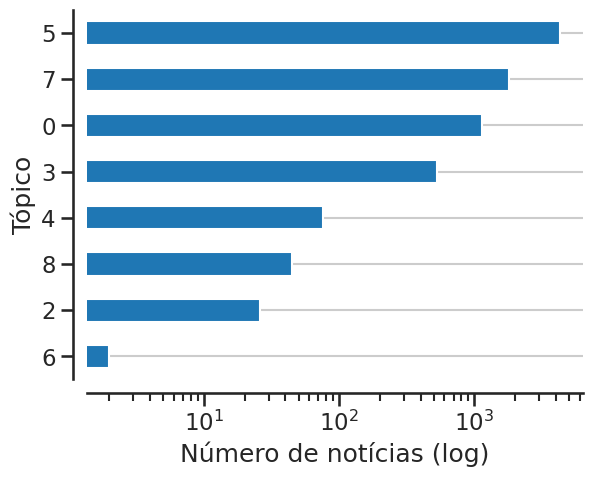

In [21]:
with sns.axes_style("ticks"):
    sns.set_context("talk")
    ax = news_2016['topic'].value_counts().sort_values().plot(kind = 'barh')
    ax.yaxis.grid(True)
    ax.set_ylabel("Tópico")
    ax.set_xlabel("Número de notícias (log)")
    sns.despine(offset = 10)
    ax.set_xscale("log")

## Crie uma nuvem de palavra para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa. 

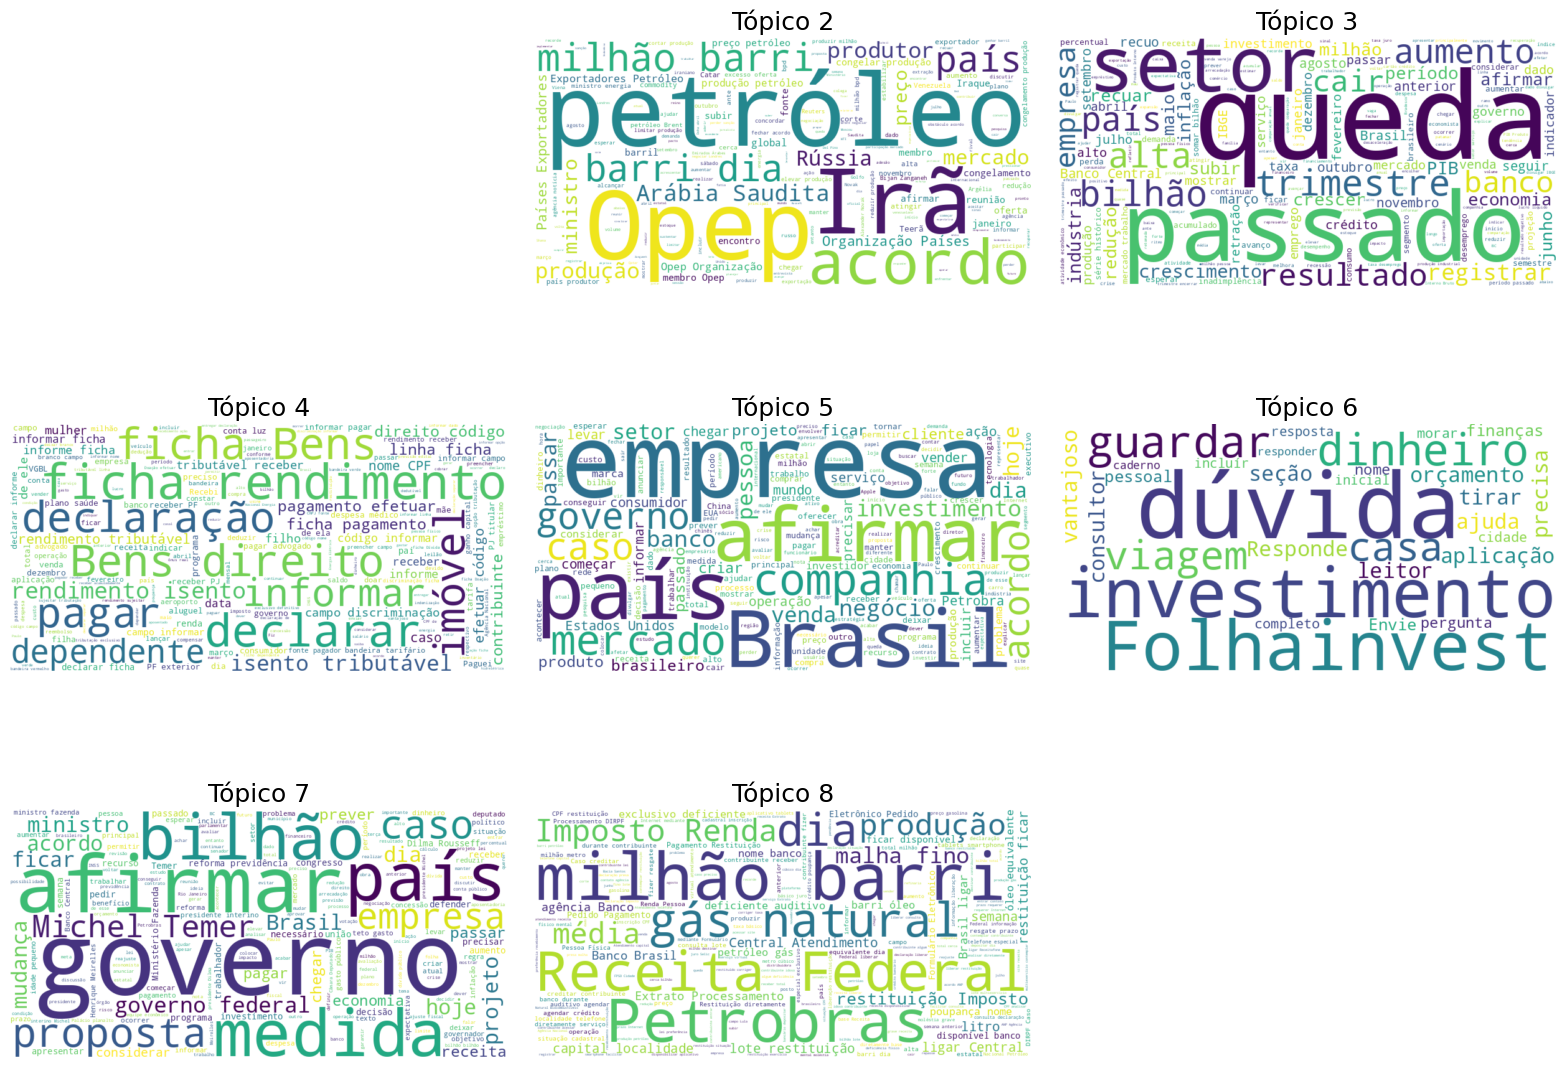

In [22]:
def plot_wordcloud(text:str, ax:plt.Axes) -> plt.Axes:
    """
    Plot a wordcloud for the given text.
    
    Arguments:
        - text: String to be analyzed.
        - ax: Matplotlib axis to plot the wordcloud.
    
    Returns:
        - ax: Modified axis with the wordcloud plot.
    """

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    
    return ax

def plot_wordcloud_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_words = chain(*topic_news.spacy_lemma.values.tolist())
    string_complete = ' '.join(list_of_words)
    if not string_complete:
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_for_a_topic(idx + 1, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")
fig.tight_layout()


## Crie uma nuvem de entidades para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa. 

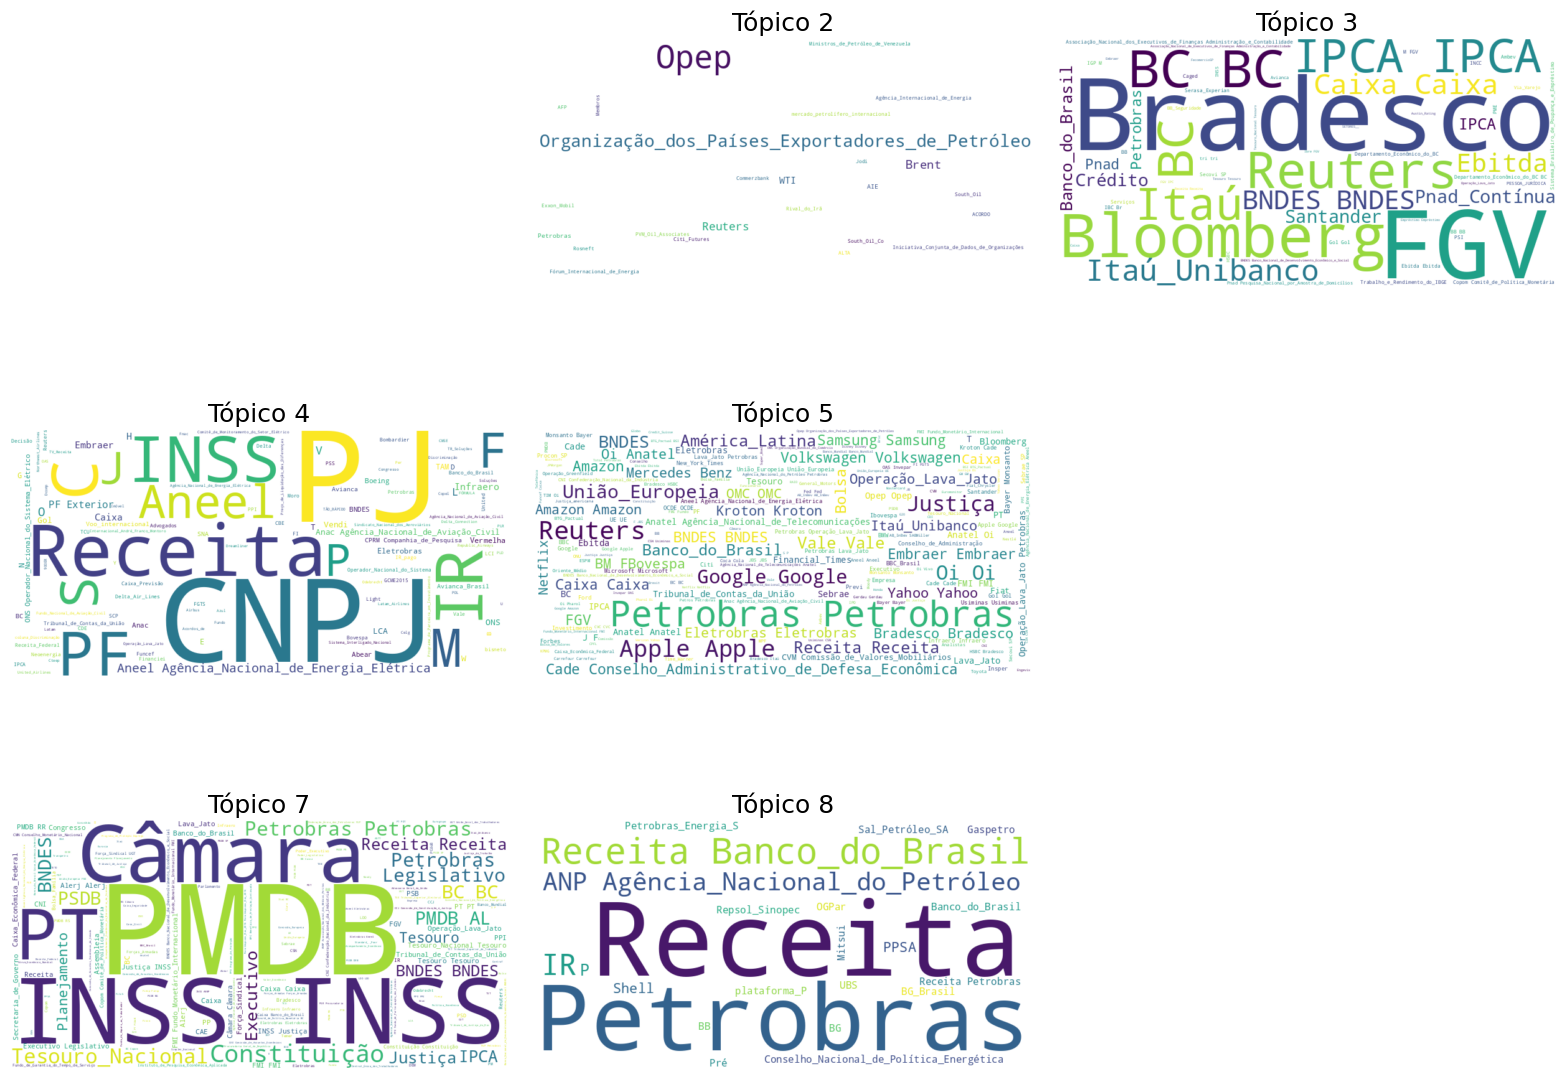

In [23]:
def plot_wordcloud_entities_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_docs = topic_news.spacy_ner.apply(lambda l : [w.replace(" ", "_") for w in l])
    list_of_words = chain(*list_of_docs)
    string_complete = ' '.join(list_of_words)
    if not len(string_complete):
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_entities_for_a_topic(idx + 1, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")
fig.tight_layout()

### Baseado nos resultados qual a diferença entre stemming e lematização, qual a diferença entre os dois procedimentos? Escolha quatro palavras para exemplificar.

- Stemming e lematização são técnicas de normalização de texto que reduzem as palavras às suas formas básicas. No entanto, cada técnica faz isso de maneira diferente:

1. Palavra: mulher

- Stemming: mulher
- Lematização: mulher

2. Palavra: comunidade

- Stemming: comun
- Lematização: comunidade

3. Palavra: fazendeiro

- Stemming: faz
- Lematização: fazendeiro

4. Palavra: conexão

- Stemming: conex
- Lematização: conexão

### Quando adotamos uma estratégia frequentista para converter textos em vetores, podemos fazê-lo de diferentes maneiras. Mostramos em aula as codificações One-Hot, TF e TF-IDF. Explique a principal motivação em adotar TF-IDF frente as duas outras opções.

- A principal motivação em adotar TF-IDF é que essa abordagem não apenas considera a frequência de termos (TF), mas também leva em conta a frequência inversa dos documentos (IDF). Isso ajuda a reduzir o peso de termos muito comuns que aparecem em todos os documentos e destaca termos que são mais exclusivos e significativos para documentos específicos, melhorando a distinção entre diferentes textos.

### Neste projeto, usamos TF-IDF para gerar os vetores que servem de entrada para o algoritmo de LDA. Quais seriam os passos para gerar vetores baseados na técnica de Doc2Vec?

- Os passos para gerar vetores baseados na técnica de Doc2Vec seriam:

1. Preparar os documentos em formato adequado para o Doc2Vec.
2. Treinar um modelo Doc2Vec com a biblioteca Gensim, por exemplo, utilizando as classes TaggedDocument e Doc2Vec.
3. Inferir os vetores para novos documentos utilizando o modelo treinado.

### Em uma versão alternativa desse projeto, optamos por utilizar o algoritmo de K-Médias para gerar os clusters (tópicos). Qual das abordagens (TF-IDF ou Doc2Vec) seria mais adequada como processo de vetorização? Justifique com comentários sobre dimensionalidade e relação semântica entre documentos.

- A abordagem com Doc2Vec seria mais adequada para a vetorização quando se utiliza K-Médias para clustering, porque Doc2Vec captura melhor a semântica dos documentos ao representar o contexto das palavras. A dimensionalidade dos vetores de Doc2Vec pode ser ajustada para capturar a riqueza semântica necessária, ao contrário dos vetores TF-IDF que apenas consideram a frequência de termos sem relação contextual.

### O algoritmo lda2vec pretende combinar o poder do word2vec com a interpretabilidade do algoritmo LDA. Em qual cenário o autor sugere que há benefícios para utilização deste novo algoritmo?

- O autor sugere que há benefícios para a utilização do algoritmo lda2vec em cenários onde é necessário capturar a semântica dos termos em um contexto mais rico e ao mesmo tempo manter a interpretabilidade dos tópicos, especialmente em grandes coleções de texto onde a modelagem de tópicos precisa ser mais robusta e intuitiva para análise qualitativa.
